In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputRegressor
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import tensorflow as tf

In [16]:
cnt = pd.read_csv("carbon_nanotubes.csv")
cnt.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [17]:
cnt.columns

Index(['Chiral indice n', 'Chiral indice m', 'Initial atomic coordinate u',
       'Initial atomic coordinate v', 'Initial atomic coordinate w',
       'Calculated atomic coordinates u'', 'Calculated atomic coordinates v'',
       'Calculated atomic coordinates w''],
      dtype='object')

In [18]:
cnt.columns=['chiral_index_n', 'chiral_index_m', 'initial_coord_u', 'initial_coord_v', 'initial_coord_w', 'calc_coord_u', 'calc_coord_v', 'calc_coord_w']
cnt_nn = cnt[['chiral_index_n', 'chiral_index_m','initial_coord_u', 'initial_coord_v', 'initial_coord_w', 'calc_coord_u', 'calc_coord_v', 'calc_coord_w']]
cnt_nn.head()

,chiral_index_n,chiral_index_m,initial_coord_u,initial_coord_v,initial_coord_w,calc_coord_u,calc_coord_v,calc_coord_w
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [19]:
cnt_nn.replace(',','.', inplace = True, regex=True)
cnt_nn = cnt_nn.apply(pd.to_numeric)

In [20]:
x_set = cnt_nn[['chiral_index_n', 'chiral_index_m','initial_coord_u', 'initial_coord_v', 'initial_coord_w']]
y_set = cnt_nn[['calc_coord_u', 'calc_coord_v', 'calc_coord_w']]

In [21]:
# split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.2)

In [22]:
# scale the dataset because of two features n and m
train = preprocessing.scale(x_train)
test = preprocessing.scale(y_test)

In [23]:
print(x_train.shape, x_test.shape)

(8576, 5) (2145, 5)


In [24]:
y_train.head()

,calc_coord_u,calc_coord_v,calc_coord_w
5259,0.461099,0.846363,0.447514
2284,0.153643,0.178826,0.009976
2203,0.833401,0.515366,0.580663
266,0.403295,0.724069,0.686613
6972,0.860424,0.868933,0.445292


### Gradient Boosting Regression

In [29]:
gbModel = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
gbModel.fit(x_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [48]:
gbModel.score(x_train, y_train)

0.9994545374766881

In [47]:
gbModel.score(x_test, y_test)

0.9991785469358153

In [30]:
y_pred_gb = gbModel.predict(x_test)

In [31]:
y_pred_gb

array([[0.21950231, 0.09088104, 0.66325339],
       [0.74196686, 0.33828746, 0.93888968],
       [0.21969787, 0.10690951, 0.13036998],
       ...,
       [0.86194014, 0.48167833, 0.70414999],
       [0.73010726, 0.89809094, 0.97139544],
       [0.28387391, 0.07535926, 0.93894746]])

In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)))

Mean Absolute Error: 0.002629001542087544
Mean Squared Error: 7.036151844753212e-05
Root Mean Squared Error: 0.008388177301865533


In [35]:
# Calculate the absolute errors
errors = abs(y_pred_gb - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: calc_coord_u    0.0
calc_coord_v    0.0
calc_coord_w    0.0
dtype: float64 degrees.
Accuracy: calc_coord_u    99.12
calc_coord_v    99.13
calc_coord_w    98.37
dtype: float64 %.


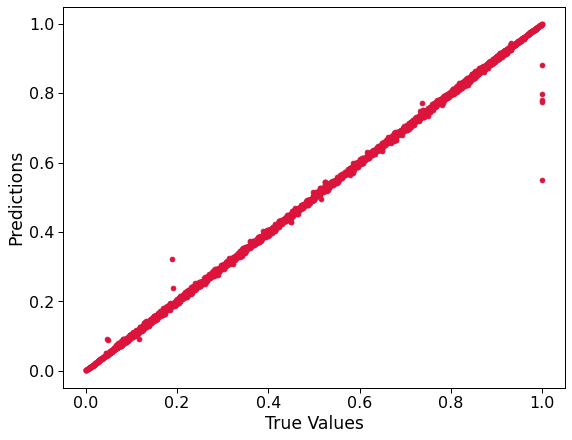

In [39]:
fig, (ax1) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax1 =sns.set_context("paper", font_scale=1.8, rc=paper_rc)

plt.scatter(y_test, y_pred_gb, color='crimson')
plt.xlabel("True Values")
plt.ylabel("Predictions")

ax1_name = 'True_vs_Predicted_value_for_XBoost' + '.jpeg'
plt.savefig(ax1_name, dpi=300);

plt.show()

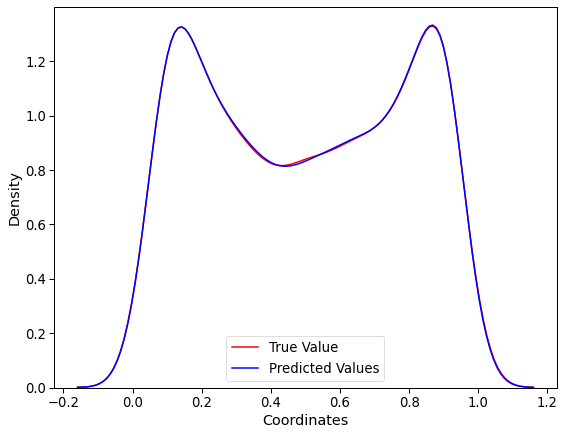

In [44]:
fig, (ax3) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax3 =sns.set_context("paper", font_scale=1.5, rc=paper_rc)

ax3 = sns.distplot(y_test, hist=False, color="r", label="True Value")
sns.distplot(y_pred_gb, hist=False, color="b", label="Predicted Values" , ax=ax3)
plt.xlabel('Coordinates')
plt.ylabel('Density')

ax3_name = 'True_vs_Predicted_value_distplot__for_XBoost' + '.tiff'
plt.savefig(ax3_name, dpi=300);


plt.show()
plt.close()